In [77]:
from math import exp
from math import factorial
from math import sqrt
import numpy as np
def f(xi,sigma,n):
    return np.sqrt((2*sigma)**n / factorial(n)) \
                          * (xi)**n \
                         *np.exp(-sigma*xi**2)
    
def kernel(data, sigma):
    kernelData = []
    N = len(data[0]) + 20
    print(N)
    for x in data:
        e_data = []
        for n in range(N):
            e_data_i = 1
            for xi in x:
                e_data_i *= f(xi,sigma,n)
            e_data.append(e_data_i)
        kernelData.append(e_data)
    return kernelData

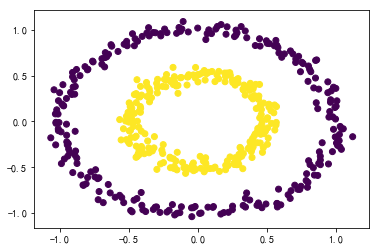

In [92]:
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
def genTwoCircles(n_samples=1000):
    X,y = datasets.make_circles(n_samples, factor=0.5, noise=0.05)
    return X, y
data, label = genTwoCircles(n_samples=500)
plt.scatter(data[:,0], data[:,1],c=label)
plt.show()

22


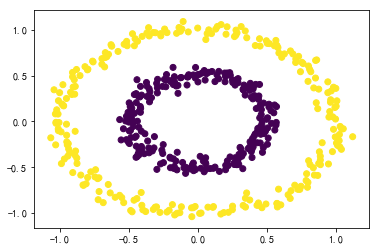

In [94]:
data2 = kernel(data,1)
kmeans = KMeans(n_clusters=2, random_state=0).fit(data2)
plt.scatter(data[:,0], data[:,1],c=kmeans.labels_)
plt.show()